In [241]:
import numpy as np

from matplotlib import pyplot as plt
from scipy import stats

%matplotlib inline

# Q1

In [242]:
D = np.random.randint(10, 50) # pick a random dimension for our matrics

a = np.random.randn(D) 
L = np.tril(np.random.randn(D, D)) # sample symmetric M by adding a lower triangular matrix L to its transpose L.T
M = L + L.T
b = np.random.randn(D)

result_1 = a.T @ M @ b

result_2 = b.T @ M @ a

print('a is a column vector of dimension {}'.format(D))
print('M is a symmetric matrix of shape ({}, {})'.format(D, D))
print('b is a column vector of dimension {}'.format(D))
print('The results of (a^T M b) and (b^T M a) are scalar values')
assert np.allclose(result_1, result_2)

a is a column vector of dimension 39
M is a symmetric matrix of shape (39, 39)
b is a column vector of dimension 39
The results of (a^T M b) and (b^T M a) are scalar values


# Q2

Linear algebra fun.

# Q3

In [243]:
m = np.random.randn()
sigma = np.exp(np.random.rand())
n = np.random.randn()
alpha = np.exp(np.random.rand())

N = 1000
x1 = m + sigma * np.random.randn(N)
v = n * np.random.randn(N)
x2 = alpha * x1 + v
x = np.vstack((x1, x2)).T

mu = np.mean(x, axis=0)
Sigma = np.cov(x, rowvar=False, ddof=1)
print('Sample estimate of mu:')
print(mu)
print('Sample estimate of Sigma')
print(Sigma)
print()

mu_theory = np.array([m, alpha * m])
Sigma_theory = np.array([[sigma**2, alpha * sigma**2], [alpha * sigma**2, alpha**2 * sigma**2 + n**2]])
print('Theoretical mu:')
print(mu_theory)
print('Theoretical Sigma:')
print(Sigma_theory)

Sample estimate of mu:
[1.29624809 2.0804386 ]
Sample estimate of Sigma
[[1.81889174 3.05248784]
 [3.05248784 7.39506679]]

Theoretical mu:
[1.24684195 1.98897998]
Theoretical Sigma:
[[1.83782161 2.93171913]
 [2.93171913 7.14583148]]


In [244]:
# To get error bars on mu, we can carry out a single trial
# However, we need multiple independent trials to get an error bar for Sigma
n_trials = 1000
D = 2
mu_estimates = np.zeros((n_trials, D))
Sigma_estimates = np.zeros((n_trials, D, D))
N = 10000

m = np.random.randn()
sigma = np.exp(np.random.rand())
n = np.random.randn()
alpha = np.exp(np.random.rand())

mu_theory = np.array([m, alpha * m])
Sigma_theory = np.array([[sigma**2, alpha * sigma**2], [alpha * sigma**2, alpha**2 * sigma**2 + n**2]])

for i in range(n_trials):
    x1 = m + sigma * np.random.randn(N)
    v = n * np.random.randn(N)
    x2 = alpha * x1 + v
    x = np.vstack((x1, x2)).T
    
    mu = np.mean(x, axis=0)
    Sigma = np.cov(x, rowvar=False, ddof=1)
    
    mu_estimates[i] += mu
    Sigma_estimates[i] += Sigma

mu_estimate = np.mean(mu_estimates, axis=0)
mu_error_bar = np.std(mu_estimates, axis=0, ddof=1) / np.sqrt(n_trials)
mu_number_std_out = (mu_estimate - mu_theory) / mu_error_bar

Sigma_estimate = np.mean(Sigma_estimates, axis=0)
Sigma_error_bar = np.std(Sigma_estimates, axis=0, ddof=1) / np.sqrt(n_trials)
Sigma_number_std_out = (Sigma_estimate - Sigma_theory) / Sigma_error_bar

print(mu_number_std_out)
print(Sigma_number_std_out)

[-0.48604983  0.11192578]
[[-0.92770812 -0.797821  ]
 [-0.797821   -0.54431192]]


# Q4

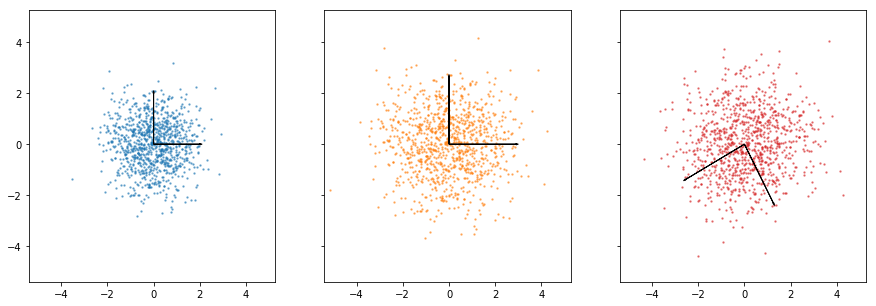

In [245]:
N = 1000
D = 2
x = np.random.randn(N, D) # draw some points from a Gaussian in the plane
Lambda = np.diag(np.exp(0.5 + np.random.rand(D))) # create matrix of eigenvalues
Q = stats.ortho_group.rvs(D) # sample random orthogonal matrix
y = x @ np.sqrt(Lambda.T) # scale along coordinate axes using eigenvalues
z = y @ Q.T # transform (rotate) to new basis using Q

lims = (np.min(z) - 1, np.max(z) + 1)
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
axs[0].scatter(x[:, 0], x[:, 1], color='C0', alpha=0.5, s=2)
# I've used unit vectors scaled by 2 here since it's easier to see them
axs[0].arrow(0, 0, 2, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
axs[0].arrow(0, 0, 0, 2, head_width=0.05, head_length=0.1, fc='k', ec='k')
axs[0].set_xlim(lims)
axs[0].set_ylim(lims)

axs[1].scatter(y[:, 0], y[:, 1], color='C1', alpha=0.5, s=2)
# plot scaled unit vectors 
axs[1].arrow(0, 0, np.sqrt(Lambda[0, 0]) * 2, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
axs[1].arrow(0, 0, 0, np.sqrt(Lambda[1, 1]) * 2, head_width=0.05, head_length=0.1, fc='k', ec='k')

axs[2].scatter(z[:, 0], z[:, 1], color='C3', alpha=0.5, s=2)
# calculate new basis
z_basis = (Q @ np.sqrt(Lambda) @ np.array([2, 0]), Q @ np.sqrt(Lambda) @ np.array([0, 2]))
# check new basis vectors are orthogonal
assert np.allclose(z_basis[0] @ z_basis[1], 0)
# plot rotated and scaled unit vectors
axs[2].arrow(0, 0, z_basis[0][0], z_basis[0][1], head_width=0.05, head_length=0.1, fc='k', ec='k')
axs[2].arrow(0, 0, z_basis[1][0], z_basis[1][1], head_width=0.05, head_length=0.1, fc='k', ec='k')